# Preparación de los modelos

En este notebook se entrenarán 5 modelos, los cuales son basados en: Regresión logística, SVM, Naive Bayes, Red neuronal y Ramdon forest

In [ ]:
!pip install scikeras==0.6.1
!pip install yellowbrick==1.4

ERROR: sphinx 4.5.0 has requirement importlib-metadata>=4.4; python_version < "3.10", but you'll have importlib-metadata 3.10.1 which is incompatible.
ERROR: markdown 3.3.6 has requirement importlib-metadata>=4.4; python_version < "3.10", but you'll have importlib-metadata 3.10.1 which is incompatible.
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Not uninstalling importlib-metadata at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'importlib-metadata'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 274 kB 39.8 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Importamos el corpus y el arreglo de stop words para usarlos

In [ ]:
import pickle

In [ ]:
with open("corpus_preparado.pkl", "rb") as corpus:
    co = pickle.load(corpus)

In [ ]:
with open("stop_words.pkl", "rb") as stopWords:
    stop_words = pickle.load(stopWords)

In [ ]:
with open("num_words.pkl", "rb") as nm:
    num_words = pickle.load(nm)

## Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.model_selection import CVScores

Convertimos cada palabra en vectores para así poder entrenar nuestro modelo


In [ ]:
vectorizer = TfidfVectorizer(lowercase=False, stop_words=stop_words)
message_matrix = vectorizer.fit_transform(co['NOTICIA_COMPLETA'])

In [ ]:
text_train, text_test, is_spam_train, is_spam_test = train_test_split(
    message_matrix, co.ETIQUETA, test_size=0.3
)

Definimos nuestro modelo de regresión logística y lo entrenamos

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty='l2')
lr.fit(text_train, is_spam_train)

LogisticRegression(solver='liblinear')

Probamos nuestro modelo con los datos de testeo y como medida de validación vamos a utilizar el accuracy

In [ ]:
prediccionLR=lr.predict(text_test)
accuracy = accuracy_score(list(is_spam_test), prediccionLR)
print("Model Accuracy : ", accuracy)

Model Accuracy :  0.8787878787878788


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


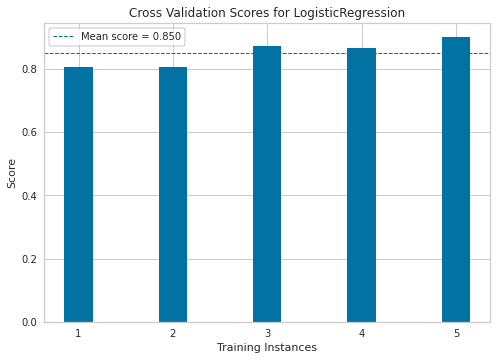

<AxesSubplot:title={'center':'Cross Validation Scores for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
vlr = CVScores(lr, cv=5, scoring='accuracy')
vlr.fit(text_train, is_spam_train)
vlr.show()

## Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

Justamos las palabras en tuplas y las vectorizamos para así poder entrenar nuestro modelo

In [ ]:
vectorizer_one = CountVectorizer(lowercase=False, stop_words=stop_words, ngram_range=(1,2))
xLabel = vectorizer.fit_transform(co['NOTICIA_COMPLETA'])

In [ ]:
xNB_train, xNB_test, yNB_train, yNB_test = train_test_split(
    xLabel, co.ETIQUETA, test_size=0.3
)

Definimos nuestro modelo basado en Naive Bayes y lo entrenamos

In [ ]:
nb = MultinomialNB() 
nb.fit(xNB_train,yNB_train)

MultinomialNB()

Probamos nuestro modelo con los datos de testeo y como medida de validación vamos a utilizar el accuracy

In [ ]:
prediccionNB = nb.predict(xNB_test)
accuracy = accuracy_score(list(yNB_test), prediccionNB)
print("Model Accuracy : ", accuracy)

Model Accuracy :  0.803030303030303


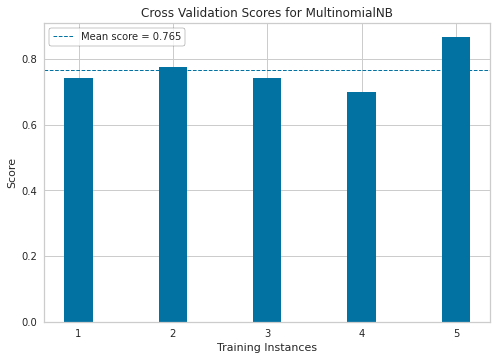

<AxesSubplot:title={'center':'Cross Validation Scores for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
vlr = CVScores(nb, cv=5, scoring='accuracy')
vlr.fit(xNB_train,yNB_train)
vlr.show()

## Support Vector Machine

In [ ]:
textSVM_train, textSVM_test, is_fake_trainSVM, is_fake_testSVM = train_test_split(
    message_matrix, co.ETIQUETA, test_size=0.3
)

In [ ]:
cv = CountVectorizer(lowercase=False, stop_words=stop_words) 
message_matrixSVM = cv.fit_transform(co['NOTICIA_COMPLETA'])

In [ ]:
textSVM_train, textSVM_test, is_fake_trainSVM, is_fake_testSVM = train_test_split(
    message_matrixSVM, co.ETIQUETA, test_size=0.3
)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(textSVM_train, is_fake_trainSVM)

SVC(random_state=0)

In [ ]:
prediccionSVM = svm.predict(textSVM_test)
accuracy = accuracy_score(list(is_fake_testSVM), prediccionSVM)
print("Model Accuracy : ", accuracy)

Model Accuracy :  0.8181818181818182


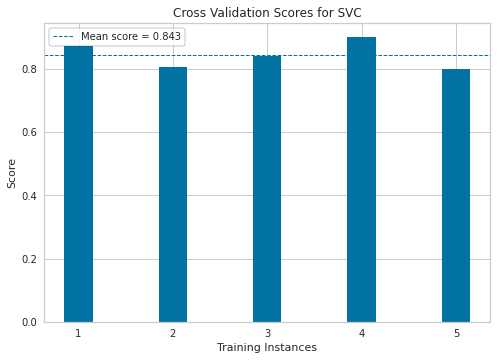

<AxesSubplot:title={'center':'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
vlr = CVScores(svm, cv=5, scoring='accuracy')
vlr.fit(textSVM_train, is_fake_trainSVM)
vlr.show()

## Recurrent Neural Network Classifier

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
xnn_train, xnn_test, ynn_train, ynn_test = train_test_split(
    co.NOTICIA, co.ETIQUETA, test_size = 0.3
)

Tokenizamos&nbsp;las&nbsp;palabras&nbsp;de&nbsp;las&nbsp;noticias&nbsp;con&nbsp;las&nbsp;cuales&nbsp;vamos&nbsp;a&nbsp;entrenar&nbsp;nuestro&nbsp;modelo

In [ ]:
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(xnn_train)

train_sequences = tokenizer.texts_to_sequences(xnn_train)
test_sequences = tokenizer.texts_to_sequences(xnn_test)

In [ ]:
print("Sin tokenizar:", co.NOTICIA[0])
print("Tokenizado: ", train_sequences[0])

Sin tokenizar: viéndonos petro uribe debe muertos risa humberto calle actual cabeza lista senado coalición centro esperanza elevó consulta consejo nacional electoral cne aclarar incurriría doble militancia medio campaña debido calle posee aval partido verde oxígeno hace parte dicha coalición salida ingrid betancourt exnegociador acuerdos paz habló tiempo inquietudes críticas inédito escenario salida ingrid betancourt sigue siendo candidato senado coalición tema político jurídico político hace dos años empezamos construir alianza buscaba evitar extremismos izquierda derecha organizar alianza fuerte centro traducía consulta popular ideal diferencias discutido aclarado dentro coalición cuanto tema jurídico normas dicen candidato partido puede apoyar partidos llama prohibición doble militancia personas anulado credencial decidí consultarle consejo nacional electoral cne establezca manera vigente manera impediría cumplir juramento apoyar gane consulta coalición marzo buscando especia llaner

Definimos un número de vectores máximo de 100 y que agregue al padding a lo último para aquellas noticias que lo necesite

In [ ]:
padded_train = pad_sequences(train_sequences,maxlen = 429, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 429, truncating = 'post')

Definimos nuestra red neuronal recurrente

In [ ]:
def rnn():
    # Sequential Model
    model = Sequential()

    # embeddidng layer
    model.add(Embedding(num_words, output_dim = 128))
    # model.add(Embedding(total_words, output_dim = 240))

    # Bi-Directional RNN and LSTM
    model.add(Bidirectional(LSTM(128)))

    # Dense layers
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1,activation= 'sigmoid'))
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    return model

In [ ]:
model = rnn()
model.fit(padded_train, ynn_train, batch_size = 64, validation_split = 0.1, epochs = 10, verbose=False)
prediccionNN = model.predict(padded_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         1373952   
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,670,145
Trainable params: 1,670,145
Non-trainable params: 0
_________________________________________________________________


Algoritmo&nbsp;convierte&nbsp;los&nbsp;valores&nbsp;predichos&nbsp;en&nbsp;1&nbsp;si&nbsp;la&nbsp;predicción&nbsp;es&nbsp;&gt;&nbsp;0.5&nbsp;sino&nbsp;0

In [ ]:
#Algoritmo sacado del notebook llamado FakeNewsClassification
#Link del repositorio: https://github.com/andresaristi/fakenewscourseraguidedproject
def aproximar(pred):
    prediction = []
    for i in range(len(pred)):
        if pred[i].item() > 0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

In [ ]:
prediccionNN = aproximar(prediccionNN)
accuracy = accuracy_score(list(ynn_test), prediccionNN)
print("Model Accuracy : ", accuracy)

Model Accuracy :  0.8939393939393939


## Random Forest Classifier

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

import multiprocessing

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stop_words)
message_matrix = vectorizer.fit_transform(co['NOTICIA_COMPLETA'])

In [ ]:
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(
    message_matrix, co.ETIQUETA, test_size=0.3
)

In [ ]:
# Definimos los hiperparametros y sus valores para entrenar 
# y probar nuestro modelo de Random Forest
param_grid = {'n_estimators': [40, 60, 100, 150],
              'max_features': [9, 12, 14, 16, 20, 22],
              'max_depth'   : [None, 3, 10, 20, 30, 40, 50],
              'criterion'   : ['gini', 'entropy']
             }

In [ ]:
# Ahora vamos a buscar los mejores hiperparametros con ayuda del Grid Search
# y validación cruzada
grid = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

In [ ]:
# Lo entrenamos para que busque los mejores hiperparametros
grid.fit(xrf_train,yrf_train)
# Mejores hiperparámetros por validación cruzada
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

{'criterion': 'entropy', 'max_depth': 30, 'max_features': 22, 'n_estimators': 40} : 0.7910394265232975 accuracy


In [ ]:
rf = grid.best_estimator_

In [ ]:
prediccionRF = rf.predict(xrf_test)

accuracy = accuracy_score(list(yrf_test), prediccionRF)
print("Model Accuracy : ", accuracy)

Model Accuracy :  0.6212121212121212


## Serialización de los modelos

A continuación, vamos a guardar los modelos que entrenamos para compararlos entre si y de esa forma escoger el modelo que mejor se adapte para nuestra solución


In [ ]:
# with open("modeloLR.pkl", "wb") as modeloLR:
#     pickle.dump(lr, modeloLR)

In [ ]:
# with open("modeloNB.pkl", "wb") as modeloNB:
#     pickle.dump(nb, modeloNB)

In [ ]:
# with open("modeloSVM.pkl", "wb") as modeloSVM:
#     pickle.dump(svm, modeloSVM)

In [ ]:
# with open("modeloNN.pkl", "wb") as modeloNN:
#     pickle.dump(model, modeloNN)

INFO:tensorflow:Assets written to: ram:///tmp/tmpddbxfmvz/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpddbxfmvz/assets


In [ ]:
# with open("modeloRF.pkl", "wb") as modeloRF:
#     pickle.dump(rf, modeloRF)

## Deserialización de los cuatro modelos

Deserializamos los modelos que entrenamos para posteriormente compararlos


In [ ]:
# with open("modeloNN.pkl", "rb") as modeloNN:
#     nn = pickle.load(modeloNN)

In [ ]:
# with open("modeloNB.pkl", "rb") as modeloNB:
#     nb = pickle.load(modeloNB)

In [ ]:
# with open("modeloLR.pkl", "rb") as modeloLR:
#     lr = pickle.load(modeloLR)

In [ ]:
# with open("modeloRF.pkl", "rb") as modeloRF:
#     rf = pickle.load(modeloRF)

## Comparación de los cuatro modelos

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
modelos = ["Regresión Logística", "Naive Bayes", "RNN", "Matrices de confusión de los 4 modelos"]
accuracys = []
tasas_de_error = []
sensibilidad = []
f1s = []
presicion = [] #Nos dice que tan bueno somo para clasificar noticias falsas

In [ ]:
# preLR = lr.predict(text_test)
# preNB = nb.predict(xNB_test)
# preNN = aproximar(prediccionNN)
# preRF = rf.predict(xrf_test)

matrizLR = confusion_matrix(is_spam_test, prediccionLR)
matrizNB = confusion_matrix(yNB_test, prediccionNB)
matrizSVM = confusion_matrix(is_fake_testSVM, prediccionSVM)
matrizNN = confusion_matrix(ynn_test, prediccionNN)
matrizRF = confusion_matrix(yrf_test, prediccionRF)

In [ ]:
dfLR = pd.DataFrame(matrizLR)
dfNB = pd.DataFrame(matrizNB)
dfSVM = pd.DataFrame(matrizSVM)
dfNN = pd.DataFrame(matrizNN)
dfRF = pd.DataFrame(matrizRF)

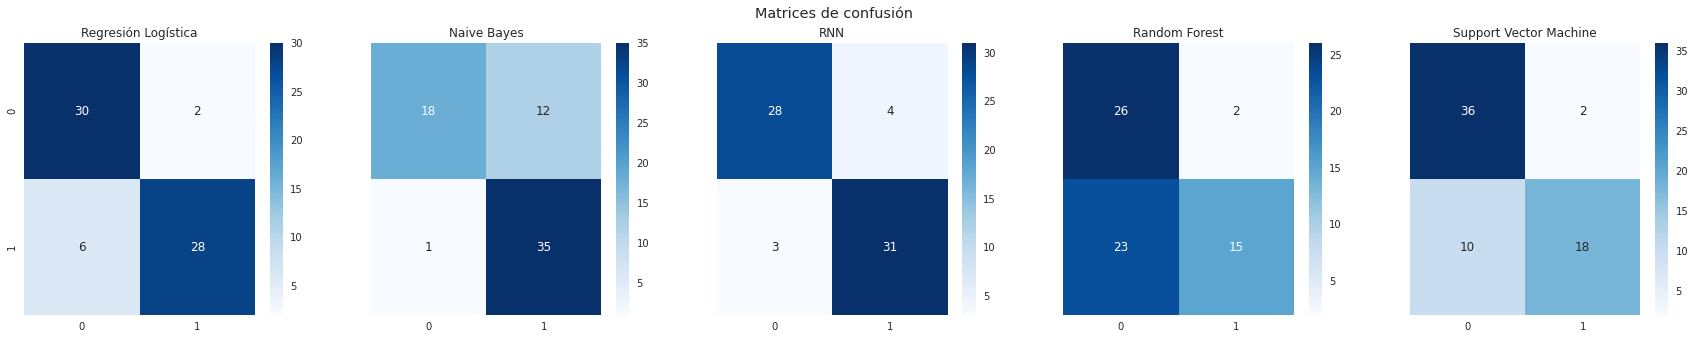

In [ ]:
fig, axs = plt.subplots(1, 5,figsize=(30,5), sharey=True)

sns.heatmap(dfLR, annot=True, cmap='Blues', ax=axs[0])
axs[0].set_title('Regresión Logística')

sns.heatmap(dfNB, annot=True, cmap='Blues', ax=axs[1])
axs[1].set_title('Naive Bayes')

sns.heatmap(dfNN, annot=True, cmap='Blues', ax=axs[2])
axs[2].set_title('RNN')

sns.heatmap(dfRF, annot=True, cmap='Blues', ax=axs[3])
axs[3].set_title('Random Forest')

sns.heatmap(dfSVM, annot=True, cmap='Blues', ax=axs[4])
axs[4].set_title('Support Vector Machine')

fig.suptitle("Matrices de confusión")
plt.show(block=False)

In [ ]:
print("Regresión Logística")
print(classification_report(is_spam_test, prediccionLR))
print("---------------------------------------------------------")
print("Naive Bayes")
print(classification_report(yNB_test, prediccionNB))
print("---------------------------------------------------------")
print("Recurrent Neural Network")
print(classification_report(ynn_test, prediccionNN))
print("---------------------------------------------------------")
print("Random Forest")
print(classification_report(yrf_test, prediccionRF))
print("---------------------------------------------------------")
print("Support Vector Machine")
print(classification_report(is_fake_testSVM, prediccionSVM))

Regresión Logística
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.93      0.82      0.87        34

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66

---------------------------------------------------------
Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.60      0.73        30
           1       0.74      0.97      0.84        36

    accuracy                           0.80        66
   macro avg       0.85      0.79      0.79        66
weighted avg       0.84      0.80      0.79        66

---------------------------------------------------------
Recurrent Neural Network
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.89      0.91      0.90        34

    accur

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2112cfd4-6a74-4eec-81a4-7450c05168f9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>